In [2]:
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

#### Getting data from drive and preprocessing using ImageDataGenerator

In [1]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Resizing image because we have large image but have limited training resource
# setting parameters
image_height =32
image_width = 32
# Processing 10 image at a time
batch_size = 10

In [5]:
# Getting access  to training,test and validation data
training_data_dir = '/content/drive/My Drive/train_dataset/training_dataset1'
validation_data_dir = '/content/drive/My Drive/validation_dataset/validation_dataset1'
testing_data_dir = '/content/drive/My Drive/test_dataset/'

# Generating training, validation and testing data 
# using ImageDataGenerator

datagen = ImageDataGenerator(1./255.0)

# Training data
training_data_generator = datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Validation data
validation_data_generator = datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Testing data
testing_data_generator = datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# testing_data_generator.reset()

Found 50992 images belonging to 46 classes.
Found 17218 images belonging to 46 classes.
Found 18294 images belonging to 46 classes.


In [6]:
labels = training_data_generator.class_indices
labels
# labels = dict((a,b) for a,b in labels.items())
# labels

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [7]:
testing_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [8]:
validation_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

## **Testing model and plotting confusion matrix**

In [9]:
p_model = load_model('/content/drive/My Drive/Pandeyfullytrained.h5')
p_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [10]:
# Verbose is helpful to see progress bar
test_prediction = p_model.predict_generator(testing_data_generator,steps = (testing_data_generator.samples/testing_data_generator.batch_size),verbose =1,workers=0)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1830/1829 [==============================] - 4256s 2s/step


In [11]:
test_prediction

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
test_prediction.shape

(18294, 46)

In [13]:
y_pred = np.argmax(test_prediction, axis=1)

In [14]:
y_pred

array([15, 40, 33, ..., 26, 44, 21])

In [15]:
y_pred.shape

(18294,)

In [16]:
labels = training_data_generator.class_indices
labels

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [17]:
predicted_class_indices = np.argmax(test_prediction,axis=1)
predicted_class_indices

array([15, 40, 33, ..., 26, 44, 21])

In [18]:
testing_data_generator.classes

array([ 0,  0,  0, ..., 45, 45, 45], dtype=int32)

In [19]:
cmt = confusion_matrix(testing_data_generator.classes,y_pred)

In [20]:
print(cmt)

[[14  7  5 ... 10  8  7]
 [12 12  9 ... 10  7 10]
 [ 7  8 11 ... 20  9 14]
 ...
 [10 11 12 ...  8 12  8]
 [ 8  4 10 ... 10 10  8]
 [15 15 13 ...  8 12 11]]


Text(0.5, 256.19999999999993, 'Predicted label')

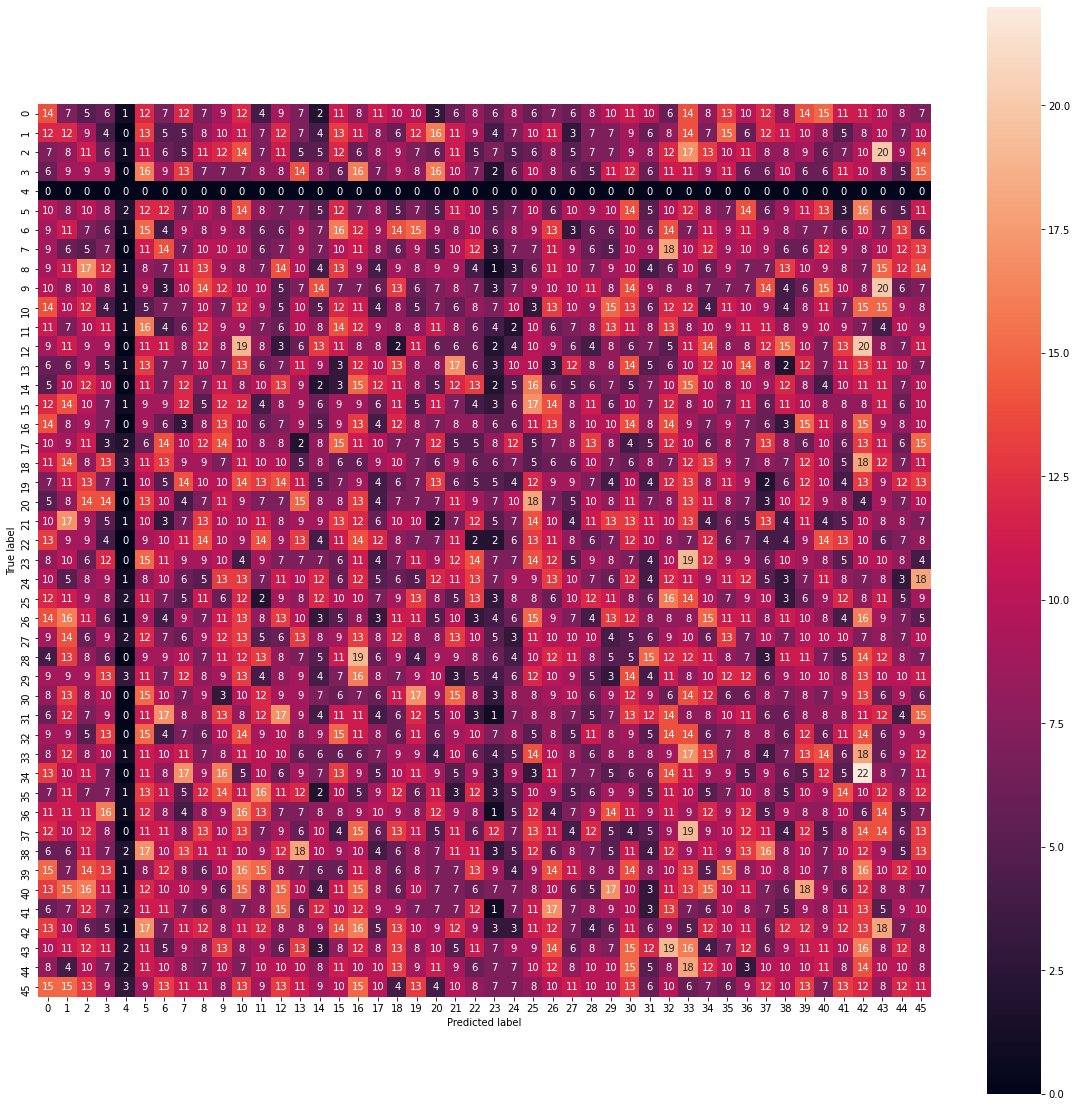

In [21]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmt,annot=True,square= True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


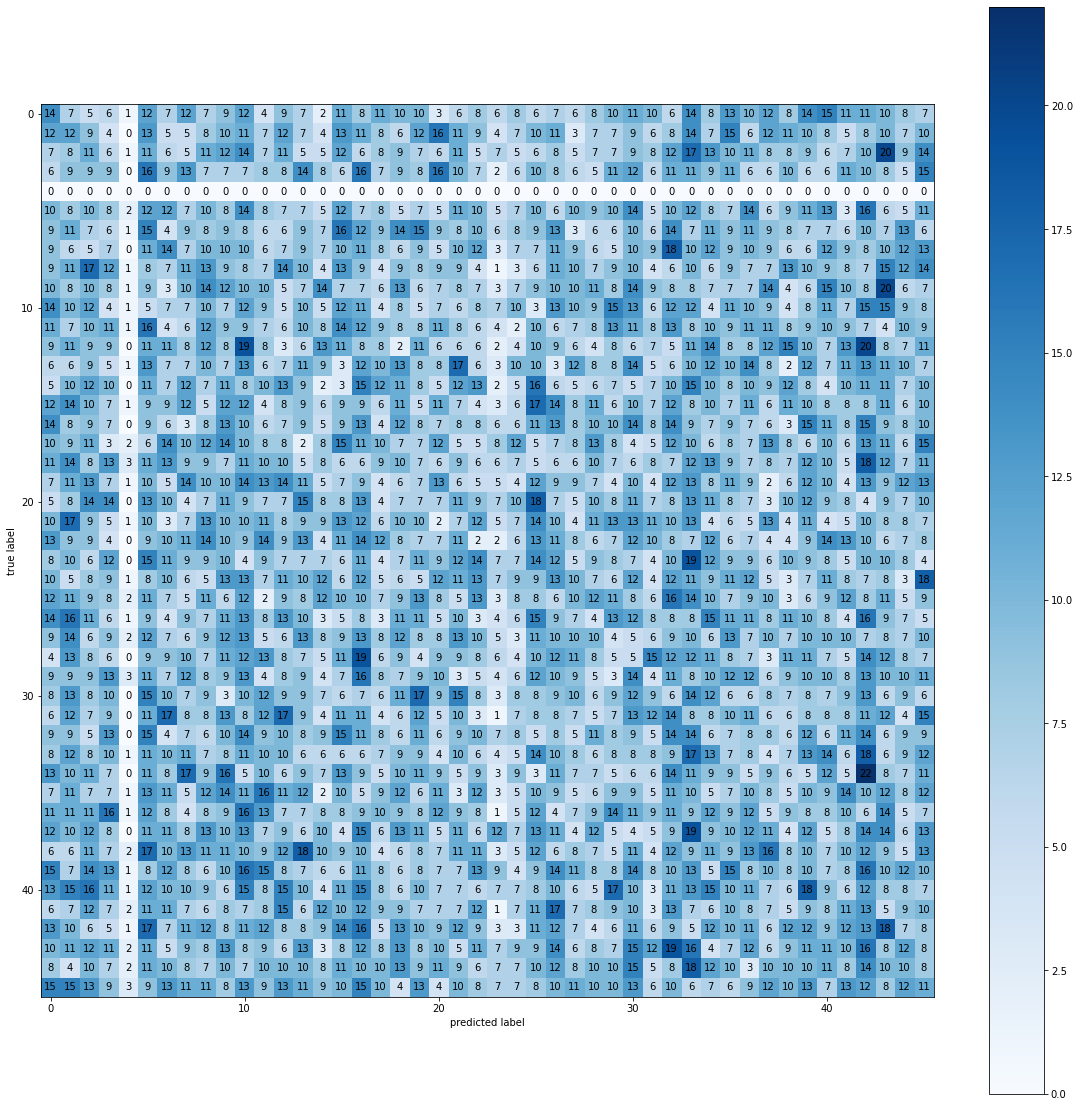

In [22]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cmt,
                                figsize=(20,20),
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()